# Simple Linear Regression

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load datasets

In [ ]:
# Load dataset file
!wget "https://dongaackr-my.sharepoint.com/:x:/g/personal/sjkim_donga_ac_kr/ET2udlQfsxRAsvnlEtgzfi0B3HAMAmqP_Y2WRsbYrTvYaA?e=t6809f&download=1" -O kc_house_data.csv
data = pd.read_csv('kc_house_data.csv', usecols=['price', 'sqft_living'])
data

--2024-10-19 05:28:03--  https://dongaackr-my.sharepoint.com/:x:/g/personal/sjkim_donga_ac_kr/ET2udlQfsxRAsvnlEtgzfi0B3HAMAmqP_Y2WRsbYrTvYaA?e=t6809f&download=1
Resolving dongaackr-my.sharepoint.com (dongaackr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to dongaackr-my.sharepoint.com (dongaackr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/sjkim_donga_ac_kr/Documents/%ea%b3%b5%ec%9c%a0%ec%9e%90%eb%a3%8c/kc_house_data.csv?ga=1 [following]
--2024-10-19 05:28:04--  https://dongaackr-my.sharepoint.com/personal/sjkim_donga_ac_kr/Documents/%ea%b3%b5%ec%9c%a0%ec%9e%90%eb%a3%8c/kc_house_data.csv?ga=1
Reusing existing connection to dongaackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 2381977 (2.3M) [application/octet-stream]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.27M  1.32MB/s    in 1.7s    

2024-10-1

price  sqft_living
0      221900.0         1180
1      538000.0         2570
2      180000.0          770
3      604000.0         1960
4      510000.0         1680
...         ...          ...
21608  360000.0         1530
21609  400000.0         2310
21610  402101.0         1020
21611  400000.0         1600
21612  325000.0         1020

[21613 rows x 2 columns]

(17290, 1)
(17290, 1)


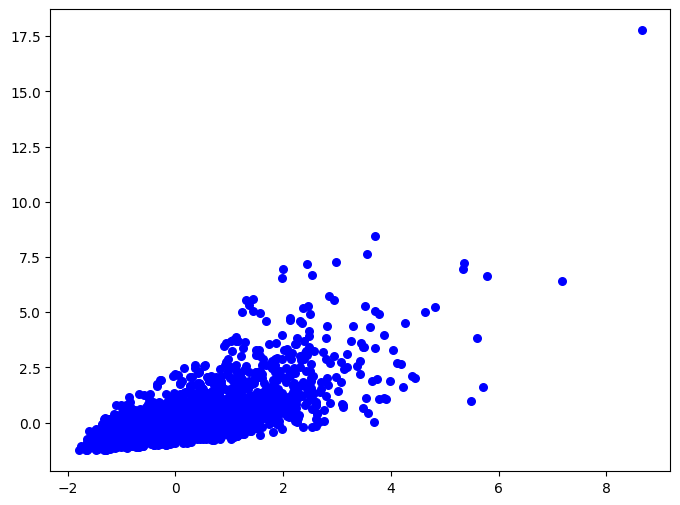

In [ ]:
# Numpy 배열로 전환
data_np = np.array(data)   # [price, sqft_living], [price, sqft_living], ... 이런 식으로 구성됨

# [:, 1] -> 모든 행에 대해서, idx 1인 값
x = data_np[:, 1]          # sqft_living
y = data_np[:, 0]          # price

# Dataset 정규화
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x = (x-x_mean)/x_std
y = (y-y_mean)/y_std

# 2차원 행렬 변환
# EX. x = [1, 2, 3]        : x.shape -> (3,)
# x = np.expand_dims(x, 0) : x.shape -> (1, 3)    : 행 벡터로 변환
# x = np.expand_dims(x, 1) : x.shape -> (3, 1)    : 열 벡터로 변환
# x = np.expand_dims(x, 2) : x.shape -> (3, 1, 1) : 3차원 배열로 변환
x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

# Train dataset / Test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(x_train.shape)
print(y_train.shape)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.show()

## LSM vs GDM 정리


### LSM
- **동시 계산**: LSM은 모든 파라미터(기울기와 절편)를 행렬 곱을 통해 한 번의 계산으로 각 파라미터들에 대한 MSE의 기울기가 0이 되는(w, b가 최소가 되는) θ를 동시에 구한다.
- 수학적으로, 모든 파라미터를 동시에 계산하여 최적의 값을 도출하는 방식
- Train, Test Data를 나눔

### GDM
- **동시 업데이트**: GDM은 각 파라미터를 동시에 업데이트하면서 최적화 과정을 진행
- MSE가 최소가 되는 파라미터 값을 점진적으로 찾아가는 과정
- 초기 파라미터는 θ = [0, 0]으로 설정
- 각 반복(iteration)에서 MSE에 대한 기울기의 크기에 따라 learning rate의 비율만큼 파라미터들을 업데이트함
- Train, Test Data가 없음

### 아래 두 방식의 파라미터 결과값
- Weight와 Bias는 LSM, GDM 각각 같음

## Least Square Method

- a 행렬과 똑같은 크기의 1로 채워진 행렬 생성:
  ```python
  arr = np.ones_like(a)
  ```
- 행렬 가로 쌓기:
  ```ptrhon
  arr = np.hstack([a, b])
  ```
- 행렬 곱:
  ```python
  arr = np.dot(a, b)
  ```
- 전치 행렬:
  ```python
  arr = a.T
  ```
- 역 행렬:
  ```python
  arr = np.linalg.inv(a)
  ```


- Goal:
$$\theta = (X^T \cdot X)^{-1} \cdot (X^T \cdot Y)$$


In [ ]:
def LSM(x, y):
  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x, bias])
  # x = np.array([[-3], [-1], [1], [3]])
  # y = np.array([[-1], [-1], [3], [3]])

  # X transepose 생성
  XT = X.T

  # X^T * X 생성
  XTX = np.dot(XT, X)

  # (X^T * X)^-1 생성
  XTX_inverse = np.linalg.inv(XTX)

  # X^T * Y 생성
  XTY = np.dot(XT, y)

  # theta 계산
  theta = np.dot(XTX_inverse, XTY)

  return theta[0], theta[1]

In [ ]:
# Train Data로 각 데이터 간의 총 오차가 최소가 되는 직선의 w, b를 구함 ->  Least Square Method
w, b = LSM(x_train, y_train)
print(w, b)

[0.70406843] [0.00267388]


## Prediction

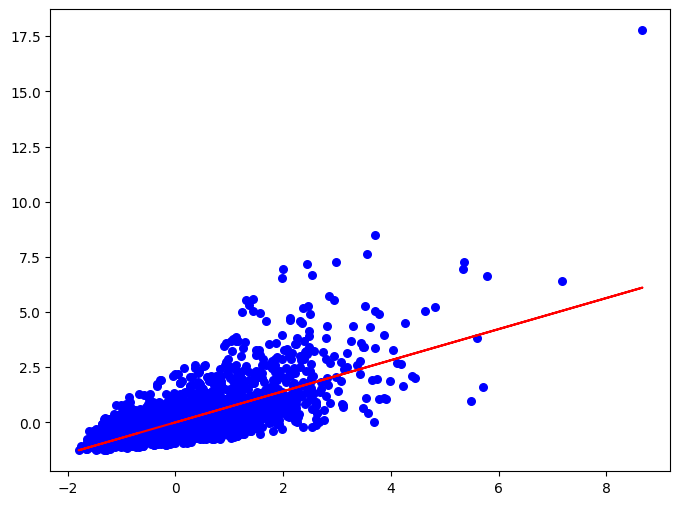

In [ ]:
# Test dataset을 이용한 예측
# Test data의 x값과 w, b를 계산해서 y_리스트에 예측값 저장
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r') # x에 대한 예측값 직선 생성
plt.show()

## Gradient Decent Method

- a 행렬과 똑같은 크기의 1로 채워진 행렬 생성:
  ```python
  arr = np.ones_like(a)
  ```
- 행렬 가로 쌓기(열 추가):
  ```ptrhon
  arr = np.hstack([a, b])
  ```
- 행렬 곱:
  ```python
  arr = np.dot(a, b)
  ```
- 행렬 내 요소 합:
  ```python
  s = np.sum(a)
  ```

In [ ]:
def GDM(x, y):
  # 하이퍼 파라미터 설정
  learning_rate = 0.1
  n_iters = 100

  # w, b 초기값 설정
  w = 0
  b = 0

  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)    # x크기만한 1로 채워진 행렬 만듦
  X = np.hstack([x, bias])  # [x값, 1], ... 로 만듦

  for i in range(n_iters):
    # [[w],
    #  [b]] 행렬 생성

    theta = np.array([w, b])
    theta = theta.reshape(2, 1)

    # y_hat 계산
    y_hat = np.dot(X, theta)

    # dw, db 계산
    # 각 파라미터에 대해 L2를 편미분했을 때의 공식
    dw = 2/x.shape[0] * sum((y - y_hat) * -x)
    db = 2/x.shape[0] * sum((y - y_hat) * -1)

    # w, b 업데이트
    # w의 기울기가 음수라는 건 x축 기준으로 기울기가 0이 되는 x값보다 작으므로 -1을 곱해서 w에 특정비율만큼 더해주는 것임
    # w의 기울기가 양수라는 건 x축 기준으로 기울기가 0이 되는 x값보다 크므로 -1을 곱해서 w에 특정비율만큼 빼주는 것임
    w = w - learning_rate * dw
    b = b - learning_rate * db

    print("w ", w, "\b", b)

  return w, b

In [ ]:
w, b = GDM(x_train, y_train)
print(w, b)

w  [0.14100532]  [-0.00029097]
w  [0.25377023]  [-0.00035837]
w  [0.34395088]  [-0.00028003]
w  [0.41607055]  [-0.0001116]
w  [0.47374653]  [0.00010773]
w  [0.51987161]  [0.00035083]
w  [0.55675921]  [0.00059941]
w  [0.58625937]  [0.00084154]
w  [0.60985162]  [0.00106984]
w  [0.62871917]  [0.00128015]
w  [0.64380823]  [0.00147053]
w  [0.65587553]  [0.00164052]
w  [0.66552623]  [0.00179067]
w  [0.67324429]  [0.00192211]
w  [0.67941677]  [0.00203631]
w  [0.68435317]  [0.00213492]
w  [0.68830104]  [0.00221959]
w  [0.69145835]  [0.00229195]
w  [0.69398341]  [0.00235355]
w  [0.69600282]  [0.00240579]
w  [0.69761786]  [0.00244995]
w  [0.6989095]  [0.00248717]
w  [0.69994249]  [0.00251846]
w  [0.70076864]  [0.00254471]
w  [0.70142936]  [0.00256667]
w  [0.70195778]  [0.00258502]
w  [0.70238039]  [0.00260032]
w  [0.70271838]  [0.00261305]
w  [0.70298869]  [0.00262363]
w  [0.70320488]  [0.00263242]
w  [0.70337778]  [0.0026397]
w  [0.70351606]  [0.00264572]
w  [0.7

## Prediction

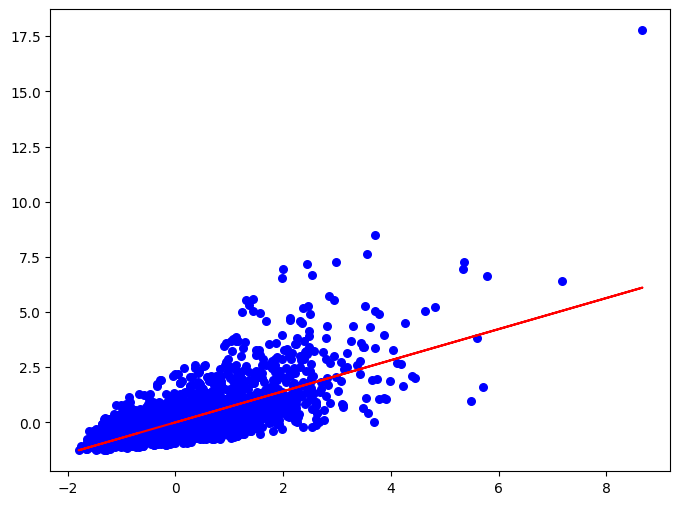

In [ ]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()